# **Libraries & Dataset Importation**

We imported all the necessary libaries for easy access in the course of our project work.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

In [2]:
train = pd.read_csv('train_redi.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')
test = pd.read_csv('test_redi.csv')
train.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday
0,0,21,24,2011-05-20,6716.32,False
1,1,29,12,2010-02-12,1741.04,True
2,2,3,96,2012-06-08,4525.13,False
3,3,14,95,2011-10-14,136819.10,False
4,4,9,52,2011-11-04,2002.81,False


# **Train Dataset Exploration & Cleaning**

The different data sets given (train, stores, features and test) were uploaded and merged to create two sets of dataframes; the "**combined_train**" and the "**combined_test**" for further exploration.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379413 entries, 0 to 379412
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    379413 non-null  int64  
 1   Store         379413 non-null  int64  
 2   Dept          379413 non-null  int64  
 3   Date          379413 non-null  object 
 4   Weekly_Sales  379413 non-null  float64
 5   IsHoliday     379413 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 14.8+ MB


In [4]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


**Data Exploration:**

The "combined_train" dataframe was created by merging "features" and "stores" data sets in one dataframe.
Exploring further, the unknown columns which are not necessary for our project was dropped while new columns consisting of "day", "week", "month", "year" were created and added to the "combined_train" dataframe.

In [6]:
#merging the datasets into one - combined_train
combined_train = train.merge(features, how='left', on=(['Store', 'Date', 'IsHoliday'])).merge(stores, on='Store')
combined_train

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,21,24,2011-05-20,6716.32,False,68.36,3.907,NaN,NaN,NaN,NaN,NaN,215.383478,7.931,B,140167
1,14,21,72,2010-09-24,33576.32,False,80.79,2.624,NaN,NaN,NaN,NaN,NaN,211.255258,8.099,B,140167
2,183,21,94,2012-05-25,679.33,False,79.49,3.561,7790.27,NaN,508.50,1575.99,4490.59,221.382803,6.891,B,140167
3,241,21,1,2011-12-23,33878.68,False,46.54,3.112,759.80,6.92,577.46,29.81,2830.92,218.999550,7.441,B,140167
4,267,21,5,2010-04-09,13943.42,False,65.74,2.770,NaN,NaN,NaN,NaN,NaN,210.283165,8.200,B,140167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379408,379122,1,80,2011-06-24,16536.03,False,83.58,3.594,NaN,NaN,NaN,NaN,NaN,215.091098,7.682,A,151315
379409,379226,1,21,2010-03-19,7829.35,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,A,151315
379410,379312,1,92,2010-11-19,157621.22,False,51.41,2.771,NaN,NaN,NaN,NaN,NaN,211.889674,7.838,A,151315
379411,379361,1,29,2011-03-25,3932.66,False,69.97,3.473,NaN,NaN,NaN,NaN,NaN,214.599939,7.742,A,151315


In [7]:
combined_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379413 entries, 0 to 379412
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    379413 non-null  int64  
 1   Store         379413 non-null  int64  
 2   Dept          379413 non-null  int64  
 3   Date          379413 non-null  object 
 4   Weekly_Sales  379413 non-null  float64
 5   IsHoliday     379413 non-null  bool   
 6   Temperature   379413 non-null  float64
 7   Fuel_Price    379413 non-null  float64
 8   MarkDown1     135468 non-null  float64
 9   MarkDown2     100103 non-null  float64
 10  MarkDown3     123268 non-null  float64
 11  MarkDown4     121384 non-null  float64
 12  MarkDown5     136153 non-null  float64
 13  CPI           379413 non-null  float64
 14  Unemployment  379413 non-null  float64
 15  Type          379413 non-null  object 
 16  Size          379413 non-null  int64  
dtypes: bool(1), float64(10), int64(4), object(2)
mem

In [8]:
#Dropping the columns which are not relevant for our analysis
combined_train.drop(columns=(['Unnamed: 0', 
                              'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5']),
                              inplace = True)
combined_train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,21,24,2011-05-20,6716.32,False,68.36,3.907,215.383478,7.931,B,140167
1,21,72,2010-09-24,33576.32,False,80.79,2.624,211.255258,8.099,B,140167
2,21,94,2012-05-25,679.33,False,79.49,3.561,221.382803,6.891,B,140167
3,21,1,2011-12-23,33878.68,False,46.54,3.112,218.999550,7.441,B,140167
4,21,5,2010-04-09,13943.42,False,65.74,2.770,210.283165,8.200,B,140167


In [9]:
#Creating new columns from the date column in our dataset
combined_train['Year'] = pd.to_datetime(combined_train['Date'], format='%Y-%m-%d').dt.year
combined_train['Month'] = pd.to_datetime(combined_train['Date'], format='%Y-%m-%d').dt.month
combined_train['Day'] = pd.to_datetime(combined_train['Date'], format='%Y-%m-%d').dt.day
combined_train['Week'] = pd.to_datetime(combined_train['Date'], format='%Y-%m-%d').dt.isocalendar().week

In [10]:
combined_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Day,Week
0,21,24,2011-05-20,6716.32,False,68.36,3.907,215.383478,7.931,B,140167,2011,5,20,20
1,21,72,2010-09-24,33576.32,False,80.79,2.624,211.255258,8.099,B,140167,2010,9,24,38
2,21,94,2012-05-25,679.33,False,79.49,3.561,221.382803,6.891,B,140167,2012,5,25,21
3,21,1,2011-12-23,33878.68,False,46.54,3.112,218.999550,7.441,B,140167,2011,12,23,51
4,21,5,2010-04-09,13943.42,False,65.74,2.770,210.283165,8.200,B,140167,2010,4,9,14


# **Data Visualization**

- We will be visualizing our dataset to find patterns and get insights

**Correlation Matrix**

This is done to gain a visual understanding of the linear relationships between each variable to enable us decide on what variables we want to use for our machine learning. From the correlation matrix below, "Size" has the most influence on "Weekly_Sales".

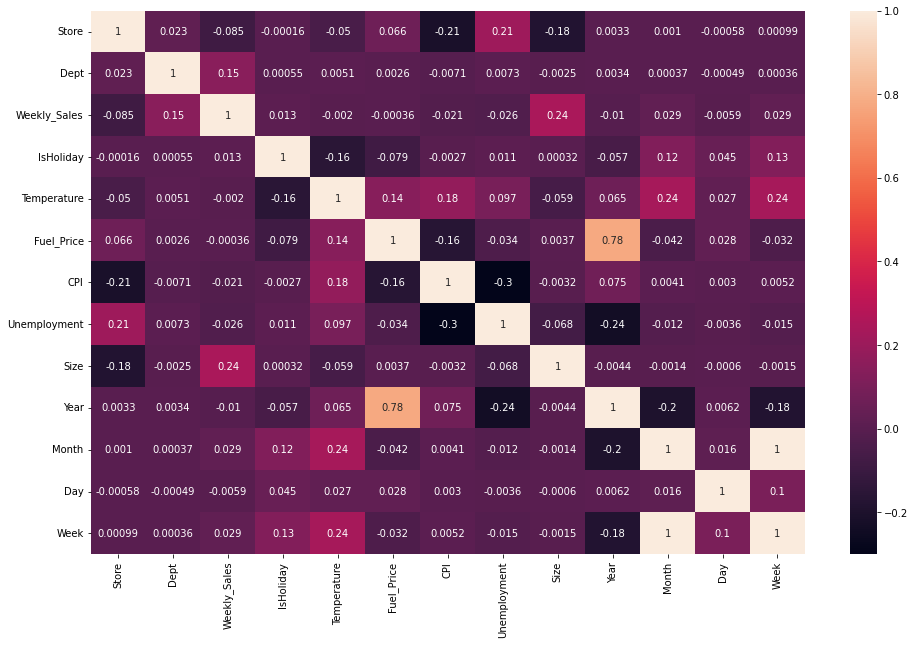

In [11]:
plt.figure(figsize=(16, 10))
sns.heatmap(combined_train.corr(), annot=True)

**Scatter Plot**

- Here we plot different variables in relationship to "Weekly_Sales" after defining it as "scatter_plot" from the **"combined_train"** dataframe.

In [12]:
#Creating a function to plot weekly sales against 8 features in the dataset
def scatter_plot(df, x_column):
  plt.figure(figsize=(10,7))
  sns.scatterplot(data=df, x=x_column, y='Weekly_Sales')
  plt.xlabel(x_column)
  plt.ylabel('Weekly Sales [$]')
  plt.title(x_column + ' Vs. Weekly Sales')
  plt.show()

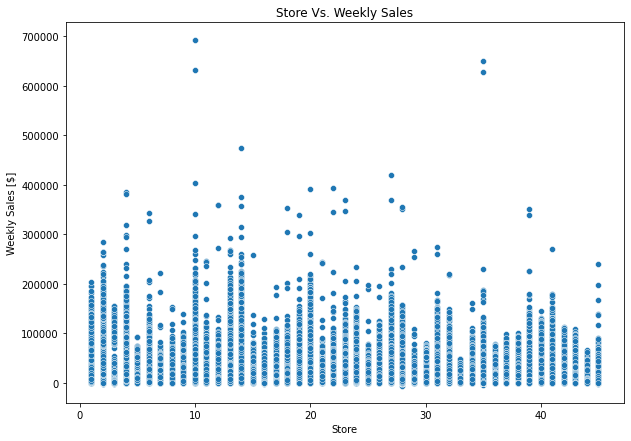

In [13]:
scatter_plot(combined_train, 'Store')

- There is a correlation between Store and Weekly sales. Each store have different weekly sales, with Store 10, having the most weekly sales at about $700,000

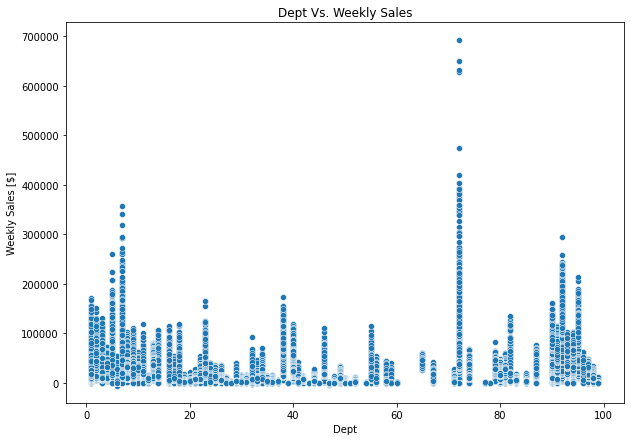

In [14]:
scatter_plot(combined_train, 'Dept')

- There is a pattern showing different weekly sales across  departments

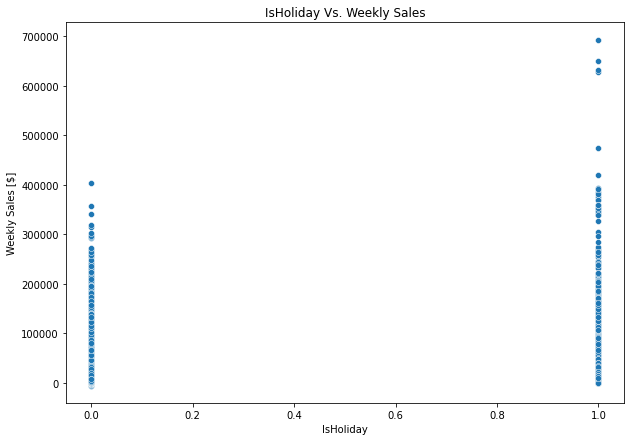

In [15]:
scatter_plot(combined_train, 'IsHoliday')

- The scatter plot shows there are more weekly sales when there are holidays relatively to when there are no holidays

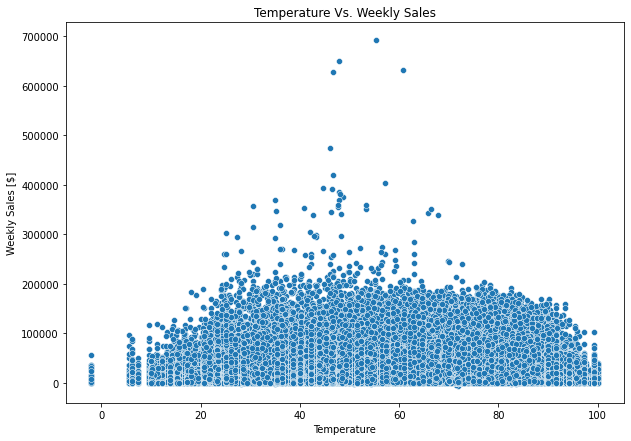

In [16]:
scatter_plot(combined_train, 'Temperature')

- There is no clear correlation between weekly sales and temperature, hence, we will drop this column from our dataset

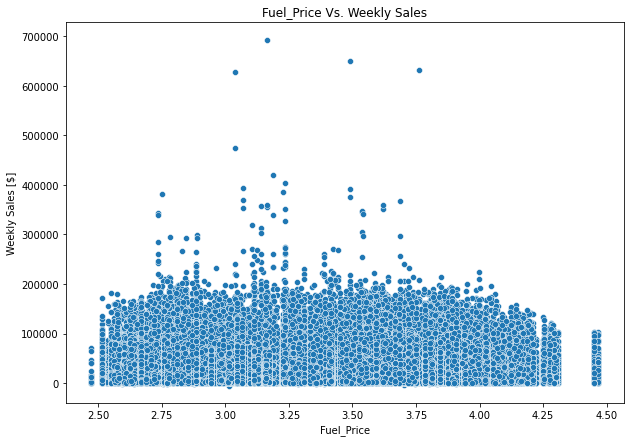

In [17]:
scatter_plot(combined_train, 'Fuel_Price')

- Just like temperature, we will be dropping the fuel price column, due to lack of correlation with weekly sales

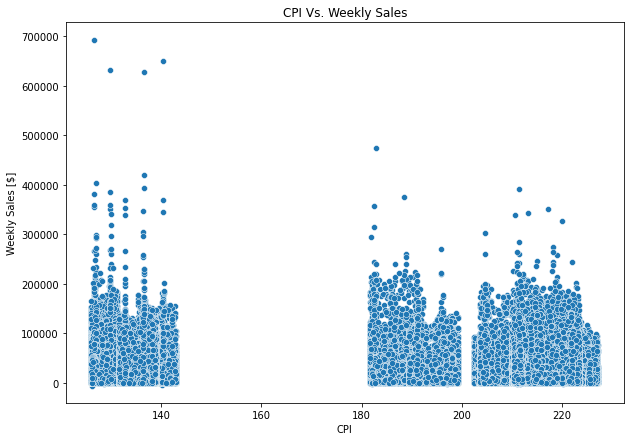

In [18]:
scatter_plot(combined_train, 'CPI')

- Although, there is to be a pattern i.e. the lower the CPI, the higher the weekly sales and vice versa. However, We are not sure if CPI is a good predictor of weekly sales. Hence, we will be dropping this column

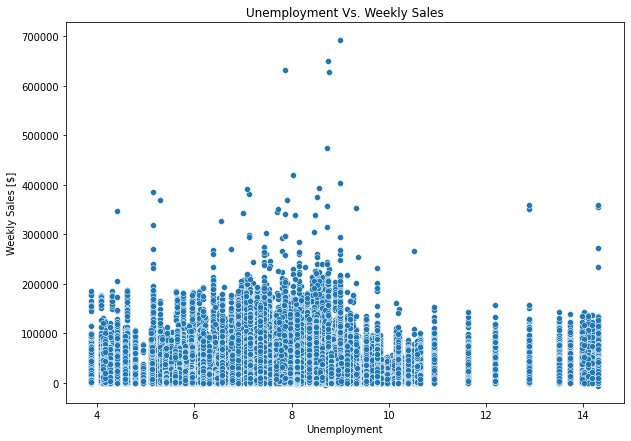

In [19]:
scatter_plot(combined_train, 'Unemployment')

- The unemployment will also be dropped due to lack of a clear pattern or correlation with weekly sales

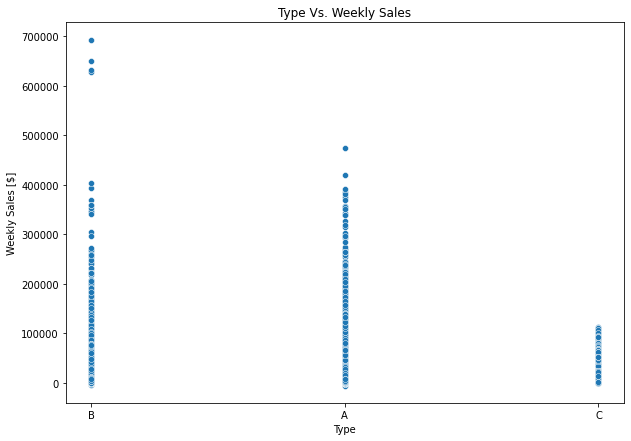

In [20]:
scatter_plot(combined_train, 'Type')

- There is a correlation and clear pattern between store type and weekly sales. Even though its not clear from our dataset what qualifies a store to be tag type A, B or C.

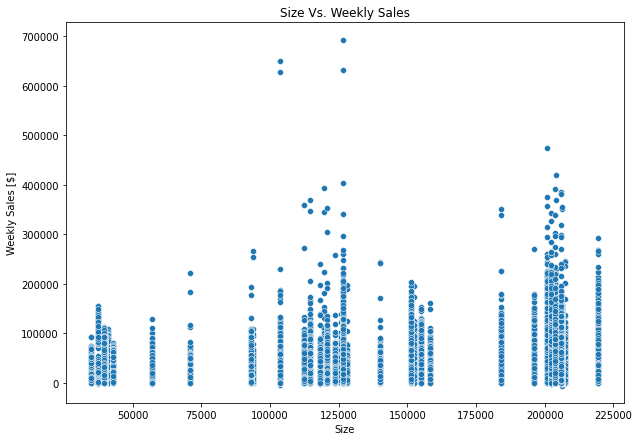

In [21]:
scatter_plot(combined_train, 'Size')

- The feature with the highest correlation with weekly sales is store size


**Diving Deeper with IsHoliday and Weekly Sales**
- The Line plot below shows the weekly sales of every month in the 3 years span (2010 - 2012). All years recorded low sales in January and very high sales starting from the October through December.
- Most of the spikes in the plot can be attributed to months with Holidays

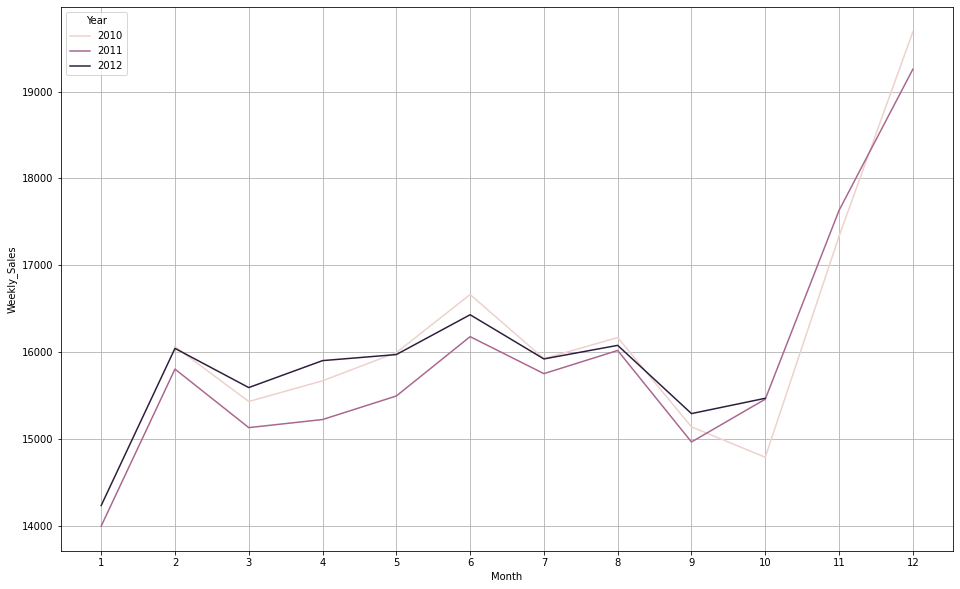

In [22]:
plt.figure(figsize=(16, 10))
plt.xticks(range(1,13),range(1,13))
sns.lineplot(x='Month', y='Weekly_Sales', data=combined_train, hue='Year',ci=None)
plt.grid()

- Below plot shows the weekly sales of every week in the 3 years span (2010 - 2012). This shows the specific week in a month with mores sales; the first week in January had more sales than the second week in both 2011 and 2012
- It is also clear that sales were only recorded from February in 2010
- There is also a sharp spike between week 12 and 17 of all years. This could be attributed to easter holidays

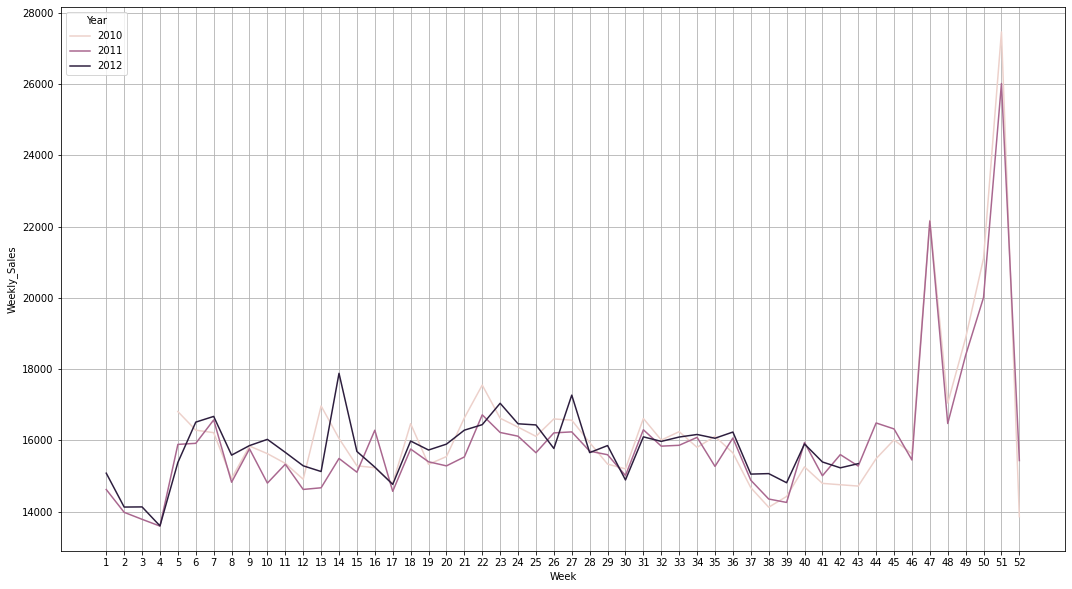

In [23]:
plt.figure(figsize=(18, 10))
plt.xticks(range(1,53),range(1,53))
sns.lineplot(x= combined_train['Week'].astype(np.float32), y='Weekly_Sales', data=combined_train, hue='Year',ci=None)
plt.grid()


**Ensuring week 12 - 17  IsHoliday**

- We checked for easter holiday dates between 2010 and 2012
- Checked if they were marked True as Holiday in our dataset
- Unfortunately they were not
- We found these dates and marked them True as Holiday. This is important to train our model with accurate data possible


In [24]:
#take week instead of dates
easter_holiday = ['2010-04-02', '2010-04-03', '2010-04-04','2010-04-05',
                  '2011-04-22', '2011-04-23', '2011-04-24','2011-04-25',
                  '2012-04-06', '2012-04-07', '2012-04-08','2012-04-09']
combined_train.loc[combined_train['Date'].isin(easter_holiday), 'IsHoliday'] = True

#Double checking to ensure this dates are now marked Isholiday True
combined_train[combined_train['Date'] == '2011-04-22']

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Day,Week
157,21,5,2011-04-22,15441.43,True,70.79,3.807,215.109666,7.931,B,140167,2011,4,22,16
211,21,92,2011-04-22,21180.35,True,70.79,3.807,215.109666,7.931,B,140167,2011,4,22,16
501,21,12,2011-04-22,3286.64,True,70.79,3.807,215.109666,7.931,B,140167,2011,4,22,16
607,21,79,2011-04-22,23321.11,True,70.79,3.807,215.109666,7.931,B,140167,2011,4,22,16
726,21,10,2011-04-22,14870.63,True,70.79,3.807,215.109666,7.931,B,140167,2011,4,22,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378575,1,82,2011-04-22,19960.32,True,72.99,3.807,215.459905,7.682,A,151315,2011,4,22,16
378650,1,9,2011-04-22,28657.31,True,72.99,3.807,215.459905,7.682,A,151315,2011,4,22,16
378719,1,27,2011-04-22,1061.68,True,72.99,3.807,215.459905,7.682,A,151315,2011,4,22,16
378979,1,92,2011-04-22,124161.59,True,72.99,3.807,215.459905,7.682,A,151315,2011,4,22,16


**Stores and Department Deep Dive**
- Diving deeper to see how weekly sales vary according to store and department
- Some store might have better weekly sales due to location and other factors 
- Similarly, some departments might out perform the others due to the type and value of goods been sold in each departments. e.g. electronics are expensive and thus, are expected to have higher weekly sales relatively to toiletries department
- Stores and departments name in our dataset are anonymous

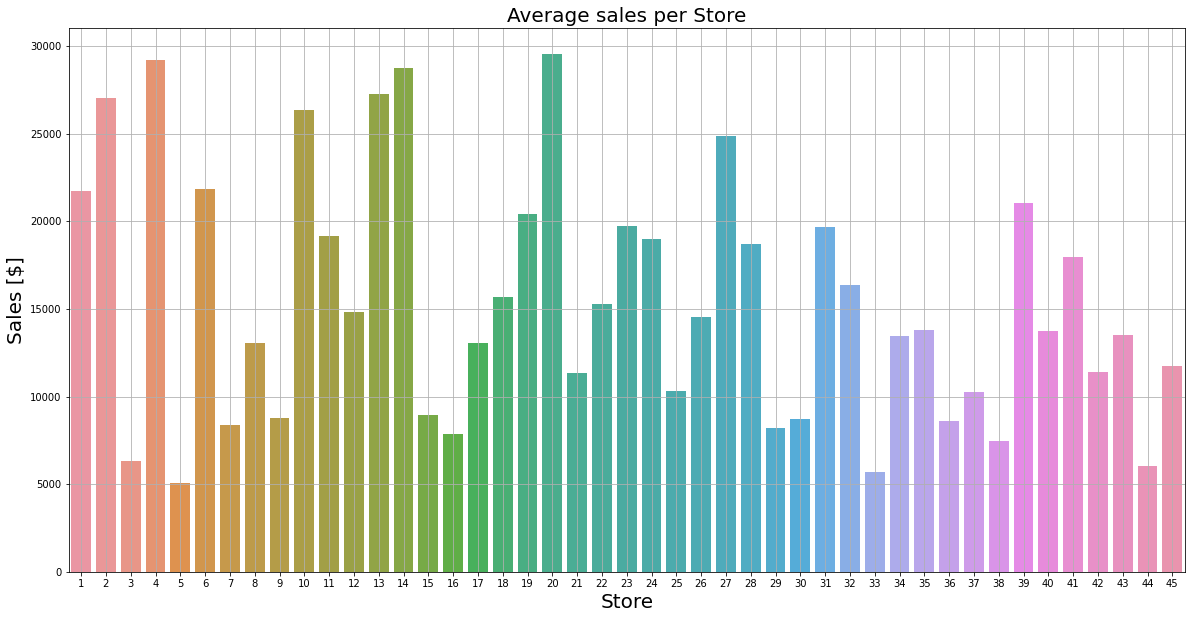

In [25]:
#Visualizing average sales per each store
avg_per_store = combined_train['Weekly_Sales'].groupby(combined_train['Store']).mean().reset_index()

plt.figure(figsize=[20, 10])
sns.barplot(x='Store', y='Weekly_Sales', data=avg_per_store)

plt.title('Average sales per Store', size=20)
plt.xlabel('Store', size=20)
plt.ylabel('Sales [$]', size=20)

plt.grid()

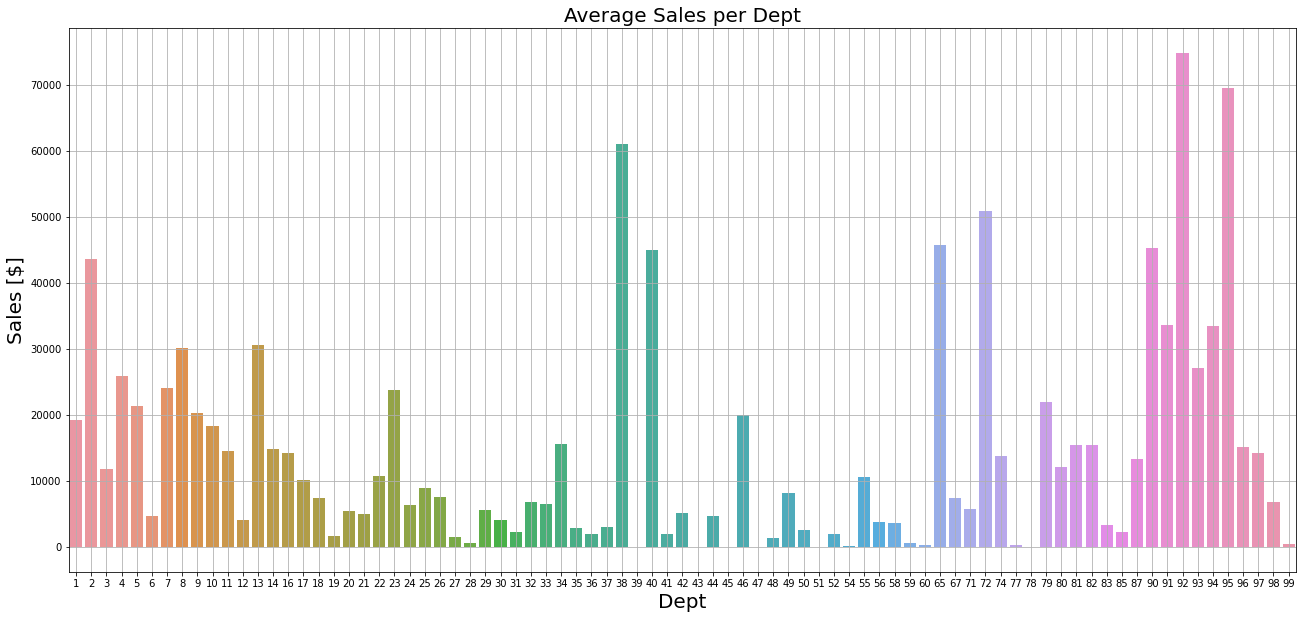

In [26]:
#Visualizing average sales per each dept
avg_per_dept = combined_train['Weekly_Sales'].groupby(combined_train['Dept']).mean().reset_index()

plt.figure(figsize=[22, 10])
sns.barplot(x='Dept', y='Weekly_Sales', data=avg_per_dept)

plt.title('Average Sales per Dept', size=20)
plt.xlabel('Dept', size=20)
plt.ylabel('Sales [$]', size=20)

plt.grid()

**Summary**
- Store - Some stores have better location or might be in states with less taxes!. We can see few stores have higher weekly average sales
- Dept - Average weekly sales also varies across department. 
- IsHoliday - There is a spike in sales in holiday season. We assume this will be a good predictor of sales
- Size - Has highest correlation with weekly sales with respect to every other features
- Type - Certain type affects the weekly sales
- Year, month,week and day of course affect weekly sales
- Weekly_Sales
- The aforelisted columns will be the ones we will be using to train our model

In [27]:
#Creating a function to encode categorical data into numeric data
def onehot_encode(df, column, prefix):
  df = df.copy()
  dummies = pd.get_dummies(df[column], prefix=prefix)
  df = pd.concat([df, dummies], axis=1)
  df = df.drop(column, axis=1)
  return df

In [28]:
#Encoding the Store and store type column
combined_train = onehot_encode(combined_train, 'Type', prefix='Type')
#combined_train = onehot_encode(combined_train, 'Store', prefix='Store')#this might not help the model

In [29]:
#Dropping columns with no correlation with weekly sales
combined_train.drop(columns=(['Date', 'Temperature', 'Fuel_Price',
                              'CPI', 'Unemployment']),
                              inplace = True)
combined_train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Year,Month,Day,Week,Type_A,Type_B,Type_C
0,21,24,6716.32,False,140167,2011,5,20,20,0,1,0
1,21,72,33576.32,False,140167,2010,9,24,38,0,1,0
2,21,94,679.33,False,140167,2012,5,25,21,0,1,0
3,21,1,33878.68,False,140167,2011,12,23,51,0,1,0
4,21,5,13943.42,False,140167,2010,4,9,14,0,1,0


#**Test Dataset Exploration & Cleaning**
- We will do the same data exploration and cleaning for the test dataset as we did for the train dataset with the exemption of the visualization part

**The Data Exploration**

The "combined_test" dataframe was created by merging "features" and "stores" data sets in one dataframe. Exploring further, the unknown columns which are not necessary for our project was dropped while new columns consisting of "day", "week", "month", "year" were created and added to the "combined_test" dataframe.

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42157 entries, 0 to 42156
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  42157 non-null  int64 
 1   Store       42157 non-null  int64 
 2   Dept        42157 non-null  int64 
 3   Date        42157 non-null  object
 4   IsHoliday   42157 non-null  bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 1.3+ MB


In [31]:
#Merging the dataset into one - combined_test
combined_test = test.merge(features, how='left', on=(['Store', 'Date', 'IsHoliday'])).merge(stores, on='Store')
combined_test

,Unnamed: 0,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,28,40,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,130.157516,12.187,A,206302
1,44,28,42,2010-08-27,False,93.19,3.129,NaN,NaN,NaN,NaN,NaN,126.089290,14.180,A,206302
2,50,28,5,2011-01-28,False,50.74,3.342,NaN,NaN,NaN,NaN,NaN,127.580032,14.021,A,206302
3,88,28,81,2011-12-23,False,45.40,3.541,2135.31,1.53,752.34,499.00,5674.11,129.984548,12.890,A,206302
4,180,28,29,2011-12-09,False,42.17,3.644,6628.73,21.00,140.19,6168.78,14073.59,129.855533,12.890,A,206302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42152,41902,40,2,2012-06-15,False,63.39,3.683,5288.06,244.82,42.74,1165.96,3695.10,138.129533,4.125,A,155083
42153,41994,40,51,2010-12-31,True,19.29,3.177,NaN,NaN,NaN,NaN,NaN,132.815032,5.287,A,155083
42154,42025,40,94,2012-03-30,False,36.25,3.921,7182.51,120.76,9.34,2017.53,2449.78,137.726193,4.261,A,155083
42155,42150,40,6,2012-01-27,False,22.91,3.568,388.59,1327.78,126.72,38.29,1619.57,136.959839,4.261,A,155083


In [32]:
combined_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42157 entries, 0 to 42156
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    42157 non-null  int64  
 1   Store         42157 non-null  int64  
 2   Dept          42157 non-null  int64  
 3   Date          42157 non-null  object 
 4   IsHoliday     42157 non-null  bool   
 5   Temperature   42157 non-null  float64
 6   Fuel_Price    42157 non-null  float64
 7   MarkDown1     15213 non-null  float64
 8   MarkDown2     11145 non-null  float64
 9   MarkDown3     13823 non-null  float64
 10  MarkDown4     13583 non-null  float64
 11  MarkDown5     15279 non-null  float64
 12  CPI           42157 non-null  float64
 13  Unemployment  42157 non-null  float64
 14  Type          42157 non-null  object 
 15  Size          42157 non-null  int64  
dtypes: bool(1), float64(9), int64(4), object(2)
memory usage: 5.2+ MB


In [33]:
combined_test.drop(columns=(['Unnamed: 0', 
                              'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5']),
                              inplace = True)
combined_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,28,40,2012-01-06,False,50.43,3.599,130.157516,12.187,A,206302
1,28,42,2010-08-27,False,93.19,3.129,126.089290,14.180,A,206302
2,28,5,2011-01-28,False,50.74,3.342,127.580032,14.021,A,206302
3,28,81,2011-12-23,False,45.40,3.541,129.984548,12.890,A,206302
4,28,29,2011-12-09,False,42.17,3.644,129.855533,12.890,A,206302


In [34]:
combined_test['Year'] = pd.to_datetime(combined_test['Date'], format='%Y-%m-%d').dt.year
combined_test['Month'] = pd.to_datetime(combined_test['Date'], format='%Y-%m-%d').dt.month
combined_test['Day'] = pd.to_datetime(combined_test['Date'], format='%Y-%m-%d').dt.day
combined_test['Week'] = pd.to_datetime(combined_test['Date'], format='%Y-%m-%d').dt.isocalendar().week

In [35]:
combined_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Day,Week
0,28,40,2012-01-06,False,50.43,3.599,130.157516,12.187,A,206302,2012,1,6,1
1,28,42,2010-08-27,False,93.19,3.129,126.089290,14.180,A,206302,2010,8,27,34
2,28,5,2011-01-28,False,50.74,3.342,127.580032,14.021,A,206302,2011,1,28,4
3,28,81,2011-12-23,False,45.40,3.541,129.984548,12.890,A,206302,2011,12,23,51
4,28,29,2011-12-09,False,42.17,3.644,129.855533,12.890,A,206302,2011,12,9,49


In [36]:
#Using the onehot_encode function to create a dummies for Store and Type
combined_test = onehot_encode(combined_test, 'Type', prefix='Type')
#combined_test = onehot_encode(combined_test, 'Store', prefix='Store')

In [37]:
combined_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Day,Week,Type_A,Type_B,Type_C
0,28,40,2012-01-06,False,50.43,3.599,130.157516,12.187,206302,2012,1,6,1,1,0,0
1,28,42,2010-08-27,False,93.19,3.129,126.089290,14.180,206302,2010,8,27,34,1,0,0
2,28,5,2011-01-28,False,50.74,3.342,127.580032,14.021,206302,2011,1,28,4,1,0,0
3,28,81,2011-12-23,False,45.40,3.541,129.984548,12.890,206302,2011,12,23,51,1,0,0
4,28,29,2011-12-09,False,42.17,3.644,129.855533,12.890,206302,2011,12,9,49,1,0,0


In [38]:
easter_holiday = ['2010-04-02', '2010-04-03', '2010-04-04','2010-04-05',
                  '2011-04-22', '2011-04-23', '2011-04-24','2011-04-25',
                  '2012-04-06', '2012-04-07', '2012-04-08','2012-04-09']
combined_test.loc[combined_test['Date'].isin(easter_holiday), 'IsHoliday'] = True

#Double checking to ensure this dates are now marked Isholiday True
combined_test[combined_test['Date'] == '2011-04-22']

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Day,Week,Type_A,Type_B,Type_C
221,28,44,2011-04-22,True,72.12,4.134,128.9553,13.736,206302,2011,4,22,16,1,0,0
312,28,97,2011-04-22,True,72.12,4.134,128.9553,13.736,206302,2011,4,22,16,1,0,0
427,28,79,2011-04-22,True,72.12,4.134,128.9553,13.736,206302,2011,4,22,16,1,0,0
930,28,26,2011-04-22,True,72.12,4.134,128.9553,13.736,206302,2011,4,22,16,1,0,0
963,18,24,2011-04-22,True,45.99,3.919,134.3571,8.975,120653,2011,4,22,16,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41868,40,9,2011-04-22,True,39.32,3.919,134.3571,4.781,155083,2011,4,22,16,1,0,0
41948,40,26,2011-04-22,True,39.32,3.919,134.3571,4.781,155083,2011,4,22,16,1,0,0
42022,40,12,2011-04-22,True,39.32,3.919,134.3571,4.781,155083,2011,4,22,16,1,0,0
42063,40,71,2011-04-22,True,39.32,3.919,134.3571,4.781,155083,2011,4,22,16,1,0,0


In [39]:
#Dropping columns with no clear correlation to weekly sales
combined_test.drop(columns=(['Date', 'Temperature', 'Fuel_Price',
                              'CPI', 'Unemployment']),
                              inplace = True)
combined_test.head()

,Store,Dept,IsHoliday,Size,Year,Month,Day,Week,Type_A,Type_B,Type_C
0,28,40,False,206302,2012,1,6,1,1,0,0
1,28,42,False,206302,2010,8,27,34,1,0,0
2,28,5,False,206302,2011,1,28,4,1,0,0
3,28,81,False,206302,2011,12,23,51,1,0,0
4,28,29,False,206302,2011,12,9,49,1,0,0


# **Machine Learning**

In [40]:
X_train = combined_train.loc[:, combined_train.columns!= 'Weekly_Sales']
Y_train = combined_train['Weekly_Sales']

In [41]:
lin_reg = LinearRegression(normalize=True)
rf = RandomForestRegressor(random_state=42)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


- That's a lot of parameters! We don't need to find out the best value for all of them but if you look at the documentation of sklearn you will find the recommendation. This tells us the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features). We will try to adjust the following parameters
- n_estimators = number of trees in the forest
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train, test_size=0.3, random_state=42)
print('Total samples in training set = ', x_train.shape[0])
print('Total samples in test set = ', x_test.shape[0])

Total samples in training set =  265589
Total samples in test set =  113824


In [43]:
x_train.head()

,Store,Dept,IsHoliday,Size,Year,Month,Day,Week,Type_A,Type_B,Type_C
309682,15,16,False,123737,2012,7,6,27,0,1,0
145973,28,10,False,206302,2011,8,26,34,1,0,0
295680,8,12,True,155078,2012,2,10,6,1,0,0
297609,8,93,False,155078,2010,4,9,14,1,0,0
319230,20,34,False,203742,2011,5,27,21,1,0,0


In [44]:
y_train.head()

309682    36466.47
145973    21946.36
295680     6422.59
297609    31679.56
319230    26819.41
Name: Weekly_Sales, dtype: float64

In [45]:
# Number of trees in random forest. Default value in sklearn is 100. Let use go from 100 to 1000.
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 5)]

# Number of features to consider at every split. The ideal number of max_features generally tend to lie close square root of number of features.
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(100, 200, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node. 2 is the default.
min_samples_split = [2, 4, 8, 10]

# Minimum number of samples required at each leaf node. 1 is the default value.
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
        
print(random_grid)

{'n_estimators': [100, 125, 150, 175, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [100, 125, 150, 175, 200, None], 'min_samples_split': [2, 4, 8, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [46]:
# Use the random grid to search for best hyperparameters
# First creating the base model to tune
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_absolute_error', n_iter = 10, cv=3, random_state=42, n_jobs = -1,  verbose=10)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.3min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 36.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [47]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 125,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 125}

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
def evaluate(model, test_features, test_labels):
  predictions = model.predict(test_features)
  mae = mean_absolute_error(test_labels, predictions)
  return mae

In [50]:
base_model = RandomForestRegressor(random_state = 42, n_jobs = -1)
base_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [51]:
base_mae = evaluate(base_model, x_test, y_test)
print(base_mae)

1337.1030085412565


In [52]:
best_random = rf_random.best_estimator_
random_mae = evaluate(best_random, x_test, y_test)
print(random_mae)

1335.9762284755411


In [53]:
final_test = combined_test


In [54]:
# Since the best_random mean average error is lower than the base_mae, We will use the it for the final prediction
combined_test['Weekly_Sales'] = best_random.predict(final_test)
combined_test.head()

,Store,Dept,IsHoliday,Size,Year,Month,Day,Week,Type_A,Type_B,Type_C,Weekly_Sales
0,28,40,False,206302,2012,1,6,1,1,0,0,53270.80880
1,28,42,False,206302,2010,8,27,34,1,0,0,5877.90128
2,28,5,False,206302,2011,1,28,4,1,0,0,23855.81304
3,28,81,False,206302,2011,12,23,51,1,0,0,20391.64536
4,28,29,False,206302,2011,12,9,49,1,0,0,8724.00584
